In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

Загружаем данные:

In [2]:
boston_data = load_boston()

X = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
Y = boston_data['target']

In [3]:
print('Dataset length: ', len(X))

Dataset length:  506


In [4]:
print('Feature counts: ', len(X.columns))
print('Features:', boston_data['feature_names'])
print(boston_data['DESCR'].split('\n\n')[4])

Feature counts:  13
Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower statu

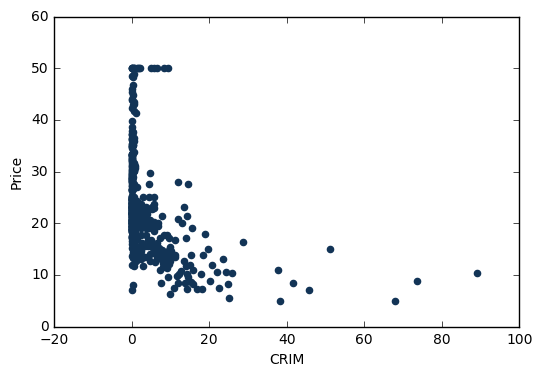

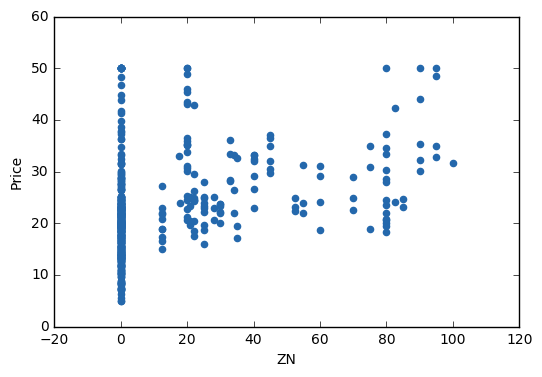

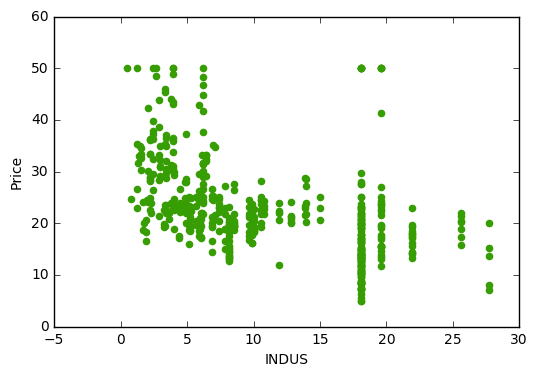

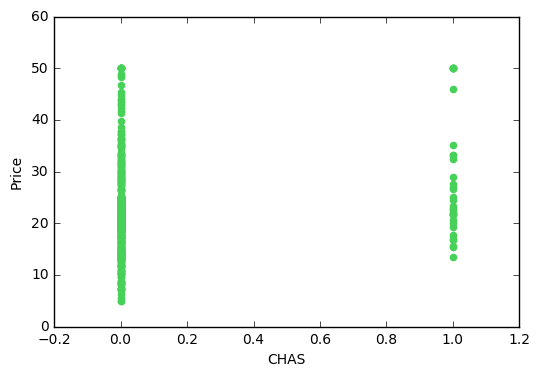

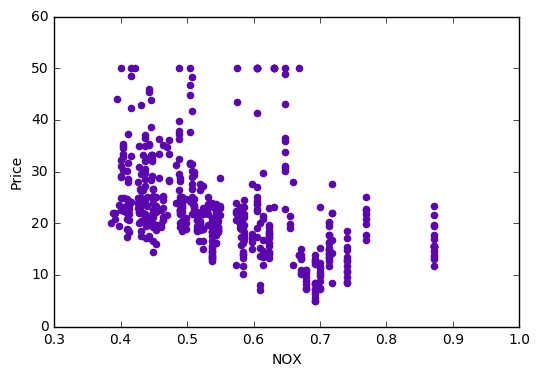

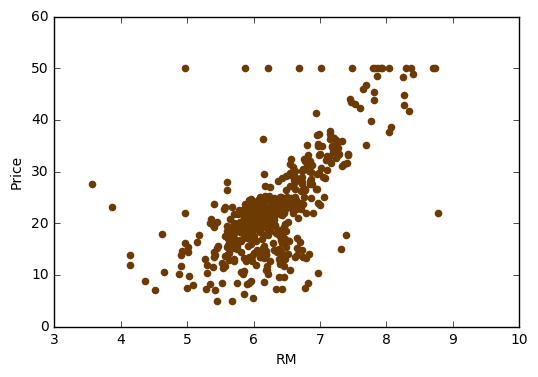

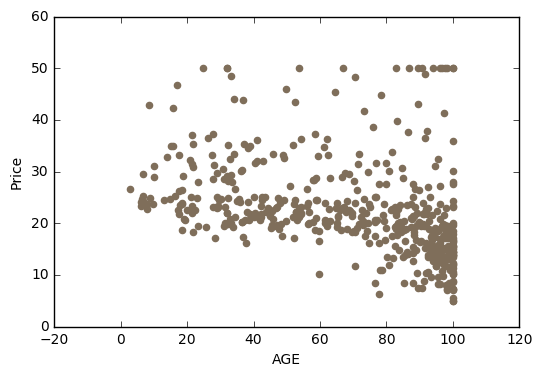

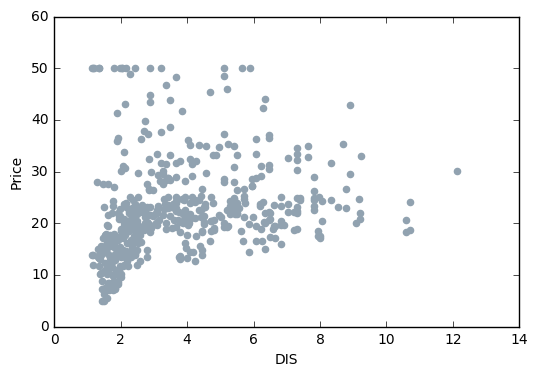

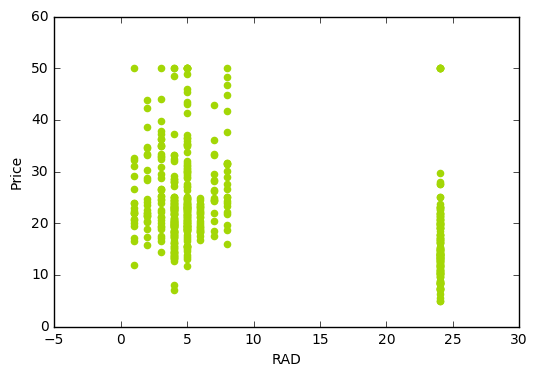

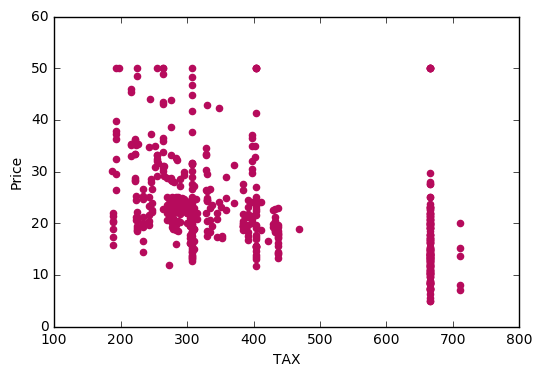

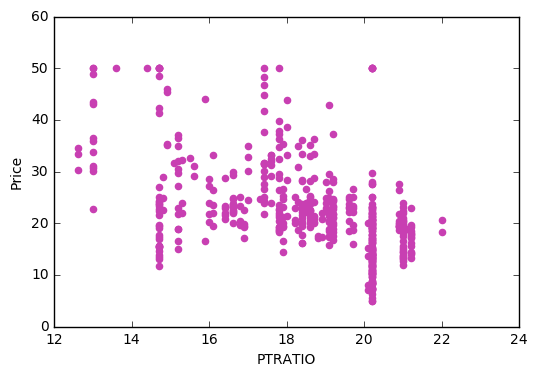

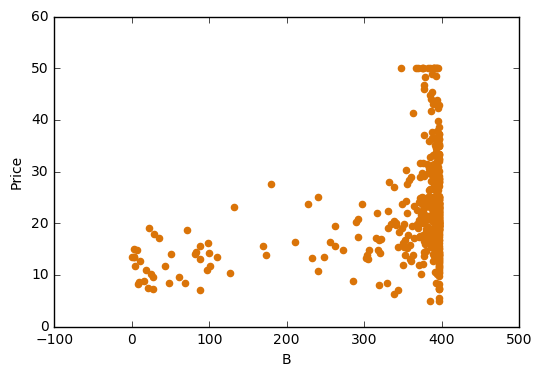

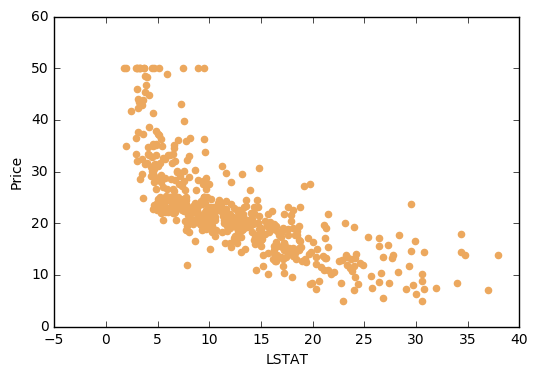

In [5]:
color = 0x0  
for attr in X.keys():
    color = (color + 0x123456) % 0xFFFFFF
    plt.scatter(X[attr], Y, color='#' + hex(color)[2:])
    plt.xlabel(attr)
    plt.ylabel('Price')
    plt.show()

In [6]:
selected_features = ['RM', 'LSTAT', 'B']
# selected_features = ['NOX', 'AGE', 'DIS']
# selected_features = ['CRIM', 'RM']
# for feature in fixed_features:
print('Selected features describe:')
print(X[selected_features].describe())

Selected features describe:
               RM       LSTAT           B
count  506.000000  506.000000  506.000000
mean     6.284634   12.653063  356.674032
std      0.702617    7.141062   91.294864
min      3.561000    1.730000    0.320000
25%      5.885500    6.950000  375.377500
50%      6.208500   11.360000  391.440000
75%      6.623500   16.955000  396.225000
max      8.780000   37.970000  396.900000


In [7]:
def fit_test(feature_degree, X, Y, normalization=True):
    # Make train-, test- features
    feat = PolynomialFeatures(degree=feature_degree)
    x_poly = feat.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, Y, test_size=0.1, random_state=42)
    # Normalization
    if normalization:
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
    # Learning
    clf = LinearRegression()
    clf.fit(x_train, y_train)
    # Calc mse
    y_predict = clf.predict(x_train)
    mse = mean_squared_error(y_predict, y_train)
    r2 = r2_score(y_train, y_predict) 
    return mse, r2, clf.score(x_train, y_train), clf.score(x_test, y_test)

In [8]:
print('test on all features:')
res = []
for degree in range(1, 7):
    res += [list(fit_test(degree, X, Y))]
res = pd.DataFrame(res, columns=['mse', 'R^2', 'train_score', 'test_score'])
display(res)

test on all features:


,mse,R^2,train_score,test_score
0,2.273948e+01,0.737493,0.737493,0.759571
1,5.937089e+00,0.931462,0.931462,0.860558
2,3.884682e-18,1.000000,1.000000,-8550.025228
3,1.239331e-23,1.000000,1.000000,-41.153329
4,8.303210e-24,1.000000,1.000000,-37.877086
5,1.170215e-23,1.000000,1.000000,-35.204542


In [9]:
print('test on features:', str(selected_features))
res = []
for degree in range(1, 7):
    res += [list(fit_test(degree, X[selected_features], Y))]
res = pd.DataFrame(res, columns=['mse', 'R^2', 'train_score', 'test_score'])
display(res)

test on features: ['RM', 'LSTAT', 'B']


,mse,R^2,train_score,test_score
0,30.505713,0.647839,0.647839,0.669739
1,20.567255,0.762570,0.762570,0.787470
2,19.234598,0.777954,0.777954,0.835899
3,15.718835,0.818540,0.818540,0.808572
4,13.922900,0.839273,0.839273,0.492848
5,12.376560,0.857124,0.857124,-5.279856


In [10]:
print('test on features:', ['CRIM', 'RM'])
res = []
for degree in range(1, 7):
    res += [list(fit_test(degree, X[['CRIM', 'RM']], Y))]
res = pd.DataFrame(res, columns=['mse', 'R^2', 'train_score', 'test_score'])
display(res)

test on features: ['CRIM', 'RM']


,mse,R^2,train_score,test_score
0,40.504187,0.532416,0.532416,0.622899
1,29.809925,0.655872,0.655872,0.782400
2,26.889049,0.689590,0.689590,0.720879
3,25.910045,0.700892,0.700892,0.629738
4,25.314579,0.707766,0.707766,0.188428
5,23.873745,0.724399,0.724399,-81.599661


In [11]:
print('test normalization')
for degree in [1, 3, 7]:
    %timeit fit_test(degree, X[selected_features], Y, normalization=True)
    %timeit fit_test(degree, X[selected_features], Y, normalization=False)

test normalization


100 loops, best of 3: 3.2 ms per loop


100 loops, best of 3: 2.83 ms per loop


100 loops, best of 3: 3.96 ms per loop


100 loops, best of 3: 3.57 ms per loop


100 loops, best of 3: 11.1 ms per loop


100 loops, best of 3: 9.15 ms per loop


In [12]:
x = np.hstack([X[selected_features], np.log(X['INDUS'].values).reshape((X.shape[0], 1))])
res = []
for degree in range(1, 7):
    res += [list(fit_test(degree, x, Y))]
res = pd.DataFrame(res, columns=['mse', 'R^2', 'train_score', 'test_score'])
display(res)

,mse,R^2,train_score,test_score
0,30.448416,0.648501,0.648501,0.686507
1,16.405593,0.810612,0.810612,0.798372
2,13.640063,0.842538,0.842538,0.804316
3,11.303942,0.869506,0.869506,0.718280
4,8.771321,0.898743,0.898743,-2.168527
5,4.780755,0.944811,0.944811,-70.588285
